<a href="https://colab.research.google.com/github/IcyGANESH/Heart-Disease-Classification-using-Logistic-Regression/blob/main/AI_Ese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4      

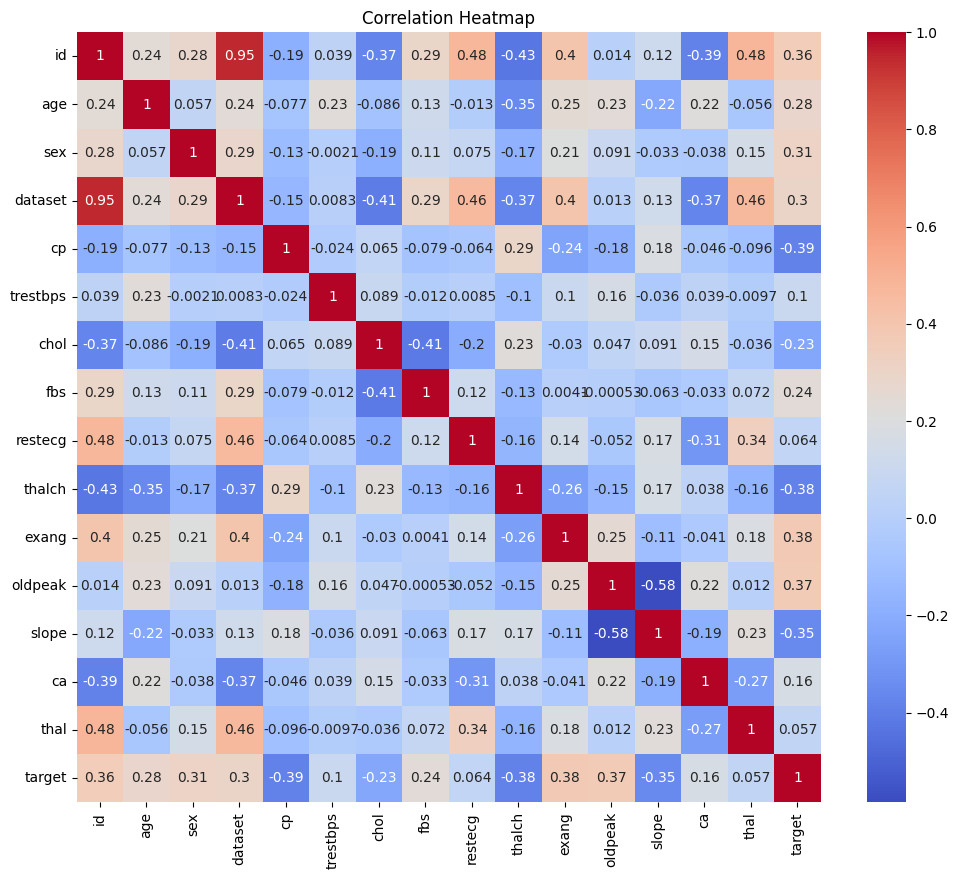

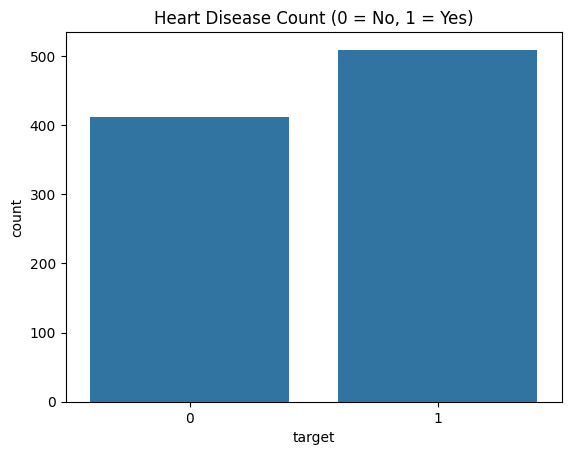

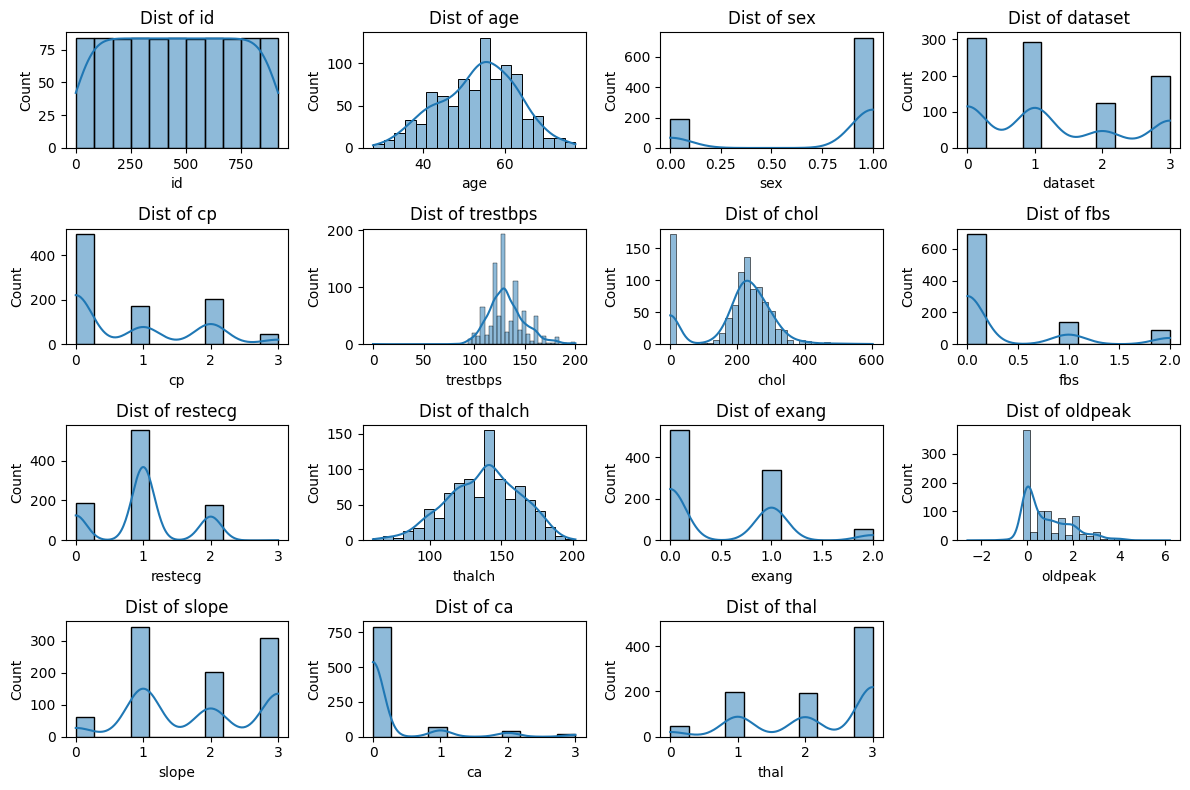


Training Set Size: (736, 15)
Test Set Size: (184, 15)

Model Evaluation:
Accuracy: 0.8206521739130435

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.80        75
           1       0.89      0.80      0.84       109

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.82      0.82       184



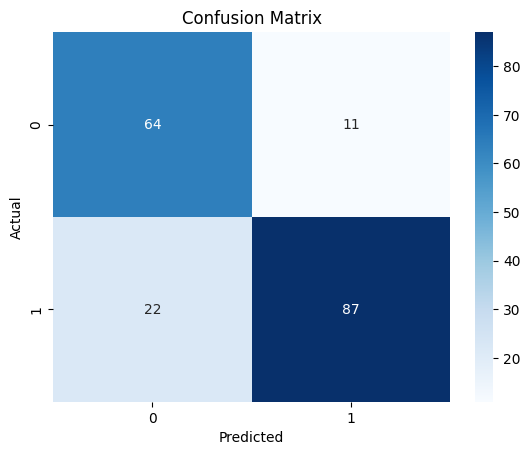

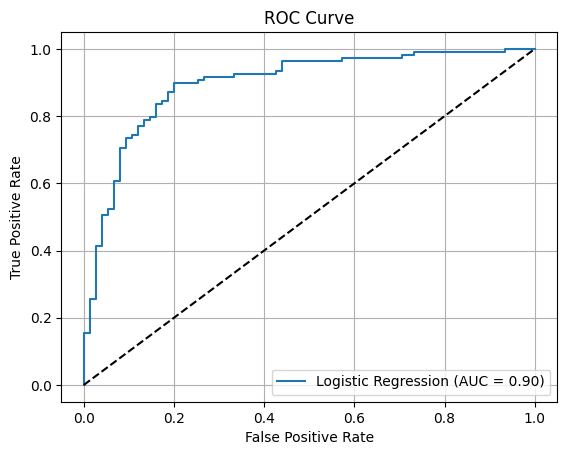

In [5]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Step 1: Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

# Clean column names (remove any spaces)
df.columns = df.columns.str.strip()

# Step 2: Display basic information
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

# Step 3: Handle categorical data
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        print(f"Encoded '{column}'")

# Step 4: Handle missing values
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric
df.fillna(df.median(), inplace=True)  # Fill NaNs with median
print("\nMissing values per column after cleaning:")
print(df.isnull().sum())

# Step 4.1: Rename target column and convert to binary classification
df.rename(columns={'num': 'target'}, inplace=True)
df['target'] = (df['target'] > 0).astype(int)  # 0 = no heart disease, 1 = heart disease

# Step 5: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 6: Countplot of target
sns.countplot(x='target', data=df)
plt.title('Heart Disease Count (0 = No, 1 = Yes)')
plt.show()

# Step 7: Distribution plot of main features
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns.drop(['target'])):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Dist of {col}")
plt.tight_layout()
plt.show()

# Step 8: Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Set Size: {X_train.shape}")
print(f"Test Set Size: {X_test.shape}")

# Step 9: Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 10: Predict and evaluate
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 12: ROC Curve (works now with binary classification)
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()